# 1. 데이터 준비하기

## 1-1. 데이터 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.2.0
60000


## 1-2. 데이터 확인

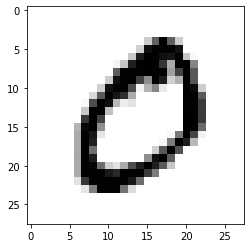

0


In [2]:
# x_train 데이터 확인
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

# y_train 데이터 확인
print(y_train[1])

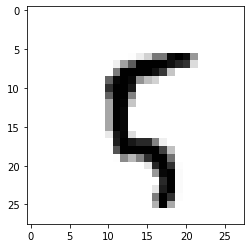

101 번째 이미지의 숫자는 바로  5 입니다.


In [3]:
# 특정 인덱스 이미지 확인
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=100     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [4]:
# 데이터 shape 확인
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## 1-3. 데이터 전처리

In [5]:
# 이미지 픽셀 값의 범위
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [6]:
# x를 0~1 사이의 값으로 정규화
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


# 2. 딥러닝 네트워크 설계하기

In [7]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

# 3. 딥러닝 네트워크 학습시키기

## 3-1. 데이터 reshape

In [9]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

# 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


## 3-2. 모델 학습시키기

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1872 - accuracy: 0.9456
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0646 - accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0482 - accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0378 - accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0252 - accuracy: 0.9920
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0206 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0175 - accuracy: 0.9940
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0149 - accuracy: 0.9950
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.013

# 4. 얼마나 잘 만들었는지 확인하기

## 4-1. 테스트 정확도 확인

In [11]:
# 테스트 데이터로 정확도 확인
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 0s - loss: 0.0388 - accuracy: 0.9891
test_loss: 0.038775183260440826 
test_accuracy: 0.9890999794006348


## 4-2. 예측값, 실제값 확인

model.predict() 결과 :  [2.5931033e-11 1.7188284e-10 3.3855931e-06 5.3460076e-07 1.2047463e-11
 3.6907102e-09 1.5299490e-16 9.9999535e-01 7.9887081e-07 4.9328062e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


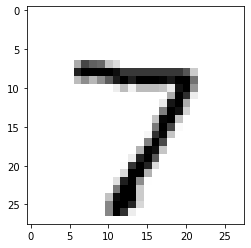

In [12]:
# 예측값 확인
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

# 실제 이미지 확인
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [2.8739118e-08 5.9339991e-06 8.5893446e-01 2.3994631e-11 1.1467672e-01
 1.4669021e-11 2.6382741e-02 9.1936707e-09 1.3865855e-07 5.1881416e-13]
라벨: 4, 예측결과: 2


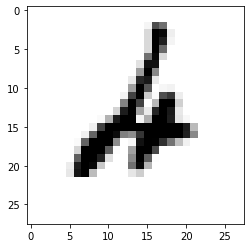

예측확률분포: [1.2738802e-07 2.3372008e-06 5.1337739e-08 2.4910392e-03 8.1978619e-09
 4.7539398e-01 2.2159719e-10 5.2210867e-01 2.6302148e-08 3.7692259e-06]
라벨: 5, 예측결과: 7


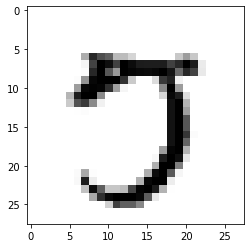

예측확률분포: [1.6832531e-09 8.7369045e-09 8.3100898e-10 9.9828291e-01 2.4032378e-09
 1.6733994e-03 1.4176671e-07 2.1463541e-12 4.3314223e-05 1.9559830e-07]
라벨: 5, 예측결과: 3


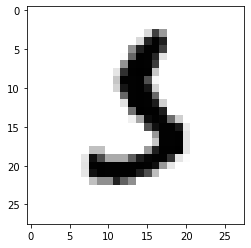

예측확률분포: [1.0052038e-09 2.5255919e-14 4.8544346e-11 2.3008191e-10 7.8133242e-09
 4.2688117e-07 3.7519870e-12 2.0049320e-06 6.7464882e-01 3.2534871e-01]
라벨: 9, 예측결과: 8


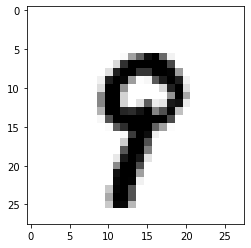

예측확률분포: [7.1812487e-01 3.0416478e-09 2.3418283e-06 3.4795630e-05 4.7323508e-12
 3.3303033e-05 9.1265763e-05 6.3327697e-11 2.8170356e-01 9.8668033e-06]
라벨: 8, 예측결과: 0


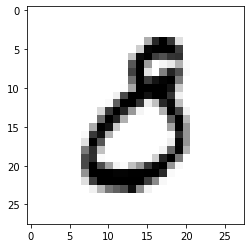

In [13]:
# 잘못 예측한 값 확인
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 5. 더 좋은 네트워크 만들어 보기

In [14]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               